# PREDICTION USING UNSUPERVISED MACHINE LEARNING : KMEANS CLUSTERING

# Data Science & Business Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
iris  = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# converting given into data frame
dataset = pd.DataFrame(iris['data'])

In [5]:
dataset.head(10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
inertia_values=[]
k = range(1,20)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(dataset)
    inertia_values.append(model.inertia_)

In [7]:
inertia_values

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.573030827867775,
 30.400007434594393,
 28.13539799820064,
 25.96294875936646,
 24.996186620397143,
 22.90130641726695,
 22.006085961424205,
 21.131823050272754,
 19.149305973266504,
 18.604903743315518,
 17.119899414311185,
 16.506570749511933,
 15.991384803921578]

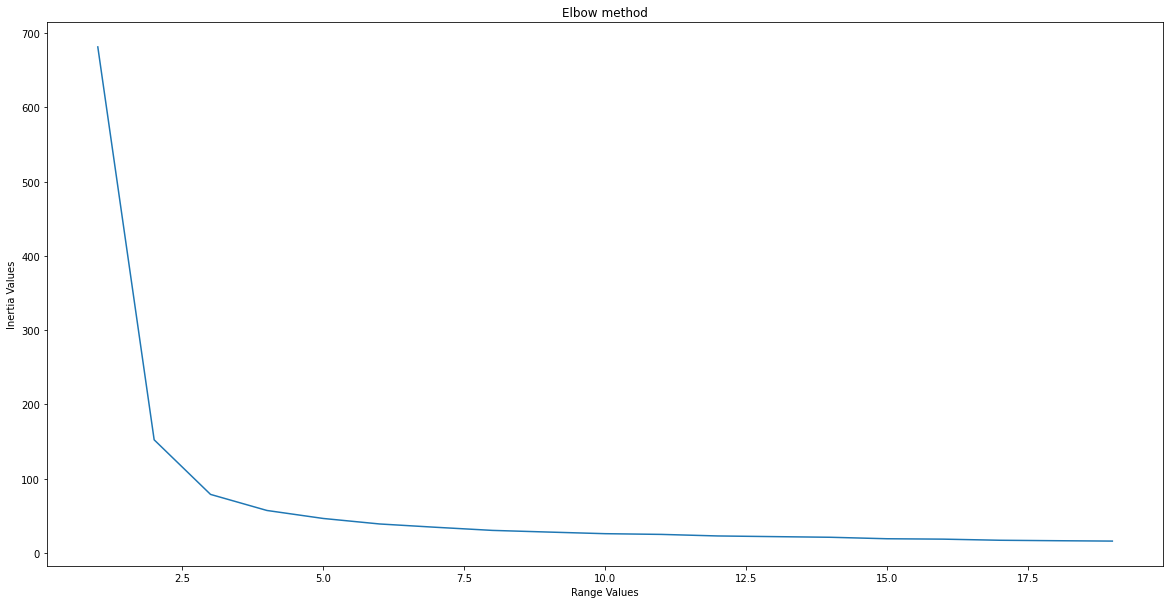

In [8]:
# Using elbow method ;
plt.figure(figsize=(20,10))
plt.plot(k,inertia_values)
plt.title("Elbow method")
plt.xlabel("Range Values")
plt.ylabel("Inertia Values")

plt.show()

In [9]:
# As we all can see the gradient descent is at lower slop and having constant descent around k =3

# therefore k = 4

In [10]:
Kmeans_final_model = KMeans(n_clusters=4)

In [11]:
Kmeans_final_model.fit(dataset)

KMeans(n_clusters=4)

In [12]:
predicted_values = Kmeans_final_model.predict(dataset)

In [13]:
myarray = np.array(predicted_values)

In [14]:
dataset['kmeans']= predicted_values
dataset['target']=iris['target']

In [15]:
dataset.columns

Index([0, 1, 2, 3, 'kmeans', 'target'], dtype='object')

In [16]:
dataset.head(-50)

,0,1,2,3,kmeans,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,0,1
96,5.7,2.9,4.2,1.3,0,1
97,6.2,2.9,4.3,1.3,3,1
98,5.1,2.5,3.0,1.1,0,1


Text(0.5, 1.0, 'K_Means')

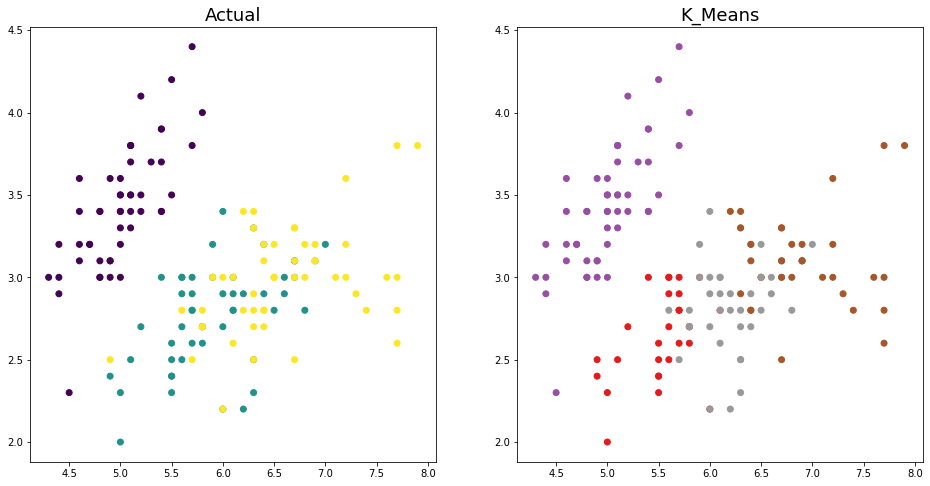

In [17]:
# scatter plot

fix , axis = plt.subplots(1,2,figsize=(16,8))
axis[0].scatter(dataset[0],dataset[1],c=dataset['target'])
axis[1].scatter(dataset[0],dataset[1],c=dataset['kmeans'],cmap=plt.cm.Set1)
axis[0].set_title('Actual',fontsize =18)
axis[1].set_title('K_Means',fontsize =18)